In [2]:
import pandas as pd
import statsmodels.api as sm
from google.colab import drive
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

<ipython-input-4-2ec9c6e9a76b>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [5]:
data.head()

,loan_id,user_id,application_start_dt,application_complete_dt,approval_dt,denial_dt,loan_initiation_dt,canceled_application_dt,loan_completion_dt,loan_amount,...,paystub_review_required_ind,region,loans_in_repayment_at_review,loans_complete_at_review,deposit_amount_recieved_at_review,deposit_count_at_review,payments_to_loan_to_date,payments_amount_to_loan_to_date,customer_acquisition_platform,m12_dollar_chargeoff
0,886208,1525324,2019-09-12,NaN,NaN,NaN,NaN,2019-09-26,NaN,556.16,...,0,Pennsylvania,0,0,0.0,0,NaN,NaN,Facebook,NaN
1,524108,840515,2019-01-31,NaN,NaN,NaN,NaN,2019-02-15,NaN,297.19,...,0,Maryland,0,0,0.0,0,NaN,NaN,Mandrill,NaN
2,476207,409144,2018-12-23,NaN,NaN,NaN,NaN,2019-01-07,NaN,141.97,...,0,Mississippi,0,0,0.0,0,NaN,NaN,MailChimp,NaN
3,1128905,1895923,2019-12-13,NaN,NaN,NaN,NaN,2019-12-28,NaN,539.98,...,0,Maryland,0,0,0.0,0,NaN,NaN,NaN,NaN
4,1086705,1554117,2019-12-05,NaN,NaN,NaN,NaN,2019-12-20,NaN,489.98,...,0,Georgia,0,0,0.0,0,NaN,NaN,Facebook,NaN


In [6]:
# Step 2: Identify duplicates in the 'user_id' column
duplicate_user_ids = data[data['user_id'].duplicated()]

# Step 3: Print the duplicate user IDs
print("Duplicate user IDs:")
print(duplicate_user_ids)

Duplicate user IDs:
        loan_id  user_id application_start_dt application_complete_dt  \
900      452002   480485           2018-12-14                     NaN   
1053     789708   278027           2019-07-23                     NaN   
1113    1161707  1897280           2019-12-23                     NaN   
1993     991810  1725605           2019-11-03                     NaN   
2279     150306   118624           2018-01-26                     NaN   
...         ...      ...                  ...                     ...   
138207   143609   222508           2018-01-01              2018-01-01   
138209   143635    64543           2018-01-01              2018-01-01   
138213   143639   586886           2018-01-01              2018-01-01   
138214   143707   223962           2018-01-01              2018-01-01   
138215   143808   139117           2018-01-01              2018-01-01   

       approval_dt denial_dt loan_initiation_dt canceled_application_dt  \
900            NaN       NaN

In [7]:


# Count non-null entries in each column
non_blank_start_dt = data['application_start_dt'].notnull().sum()
non_blank_complete_dt = data['application_complete_dt'].notnull().sum()

print("Number of rows with a value in 'application_start_dt':", non_blank_start_dt)
print("Number of rows with a value in 'application_complete_dt':", non_blank_complete_dt)


Number of rows with a value in 'application_start_dt': 138216
Number of rows with a value in 'application_complete_dt': 83359


In [8]:
import pandas as pd



# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols = data.select_dtypes(exclude=['int64', 'float64']).columns

print("Numeric columns:")
print(numeric_cols)

print("\nNon-numeric columns:")
print(non_numeric_cols)


Numeric columns:
Index(['loan_id', 'user_id', 'loan_amount', 'number_of_payments',
       'delinquent_balance_d30', 'delinquent_balance_d60',
       'pinwheel_eligible_ind', 'estimated_customer_income',
       'paystub_review_required_ind', 'loans_in_repayment_at_review',
       'loans_complete_at_review', 'deposit_amount_recieved_at_review',
       'deposit_count_at_review', 'payments_to_loan_to_date',
       'payments_amount_to_loan_to_date', 'm12_dollar_chargeoff'],
      dtype='object')

Non-numeric columns:
Index(['application_start_dt', 'application_complete_dt', 'approval_dt',
       'denial_dt', 'loan_initiation_dt', 'canceled_application_dt',
       'loan_completion_dt', 'perpay_risk_tier', 'loan_current_status',
       'customers_employer', 'approval_type', 'region',
       'customer_acquisition_platform'],
      dtype='object')


In [9]:

# Create a new column 'application_completed_flag'
# 1 if 'application_complete_dt' has a value, 0 if it's null.
data['application_completed_flag'] = data['application_complete_dt'].notnull().astype(int)

# View the result
print(data[['application_complete_dt', 'application_completed_flag']].head())


  application_complete_dt  application_completed_flag
0                     NaN                           0
1                     NaN                           0
2                     NaN                           0
3                     NaN                           0
4                     NaN                           0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



y = data['application_completed_flag']
X = data.drop(columns=['application_completed_flag', 'application_complete_dt'])

# Identify your categorical vs. numeric columns
# Adjust these lists based on your dataset
categorical_cols = [
    'application_start_dt', 'approval_dt',
       'denial_dt', 'loan_initiation_dt', 'canceled_application_dt',
       'loan_completion_dt', 'perpay_risk_tier', 'loan_current_status',
       'customers_employer', 'approval_type', 'region',
       'customer_acquisition_platform'
]
numeric_cols = [
    'loan_id', 'user_id', 'loan_amount', 'number_of_payments',
    'delinquent_balance_d30', 'delinquent_balance_d60',
    'pinwheel_eligible_ind', 'estimated_customer_income',
    'paystub_review_required_ind', 'loans_in_repayment_at_review',
    'loans_complete_at_review', 'deposit_amount_recieved_at_review',
    'deposit_count_at_review', 'payments_to_loan_to_date',
    'payments_amount_to_loan_to_date', 'm12_dollar_chargeoff'
]

# 2. RANDOM FOREST WITH LABEL ENCODING


# Make a copy of X for label encoding
X_label = X.copy()

# Label-encode the categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    # Convert to string in case of missing or numeric-labeled categories
    X_label[col] = le.fit_transform(X_label[col].astype(str))

# Train-test split
X_train_lab, X_test_lab, y_train_lab, y_test_lab = train_test_split(
    X_label, y, test_size=0.3, random_state=42
)

# Initialize and train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_lab, y_train_lab)

# Predictions
y_pred_rf = rf_model.predict(X_test_lab)

# Evaluate
accuracy_rf = accuracy_score(y_test_lab, y_pred_rf)
print("Random Forest Accuracy (Label Encoding):", accuracy_rf)

# Feature importance
importances = rf_model.feature_importances_
feature_importance_rf = pd.DataFrame({
    'feature': X_label.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
print("\nRandom Forest Feature Importance (Top 20):")
print(feature_importance_rf.head(20))

Random Forest Accuracy (Label Encoding): 0.8943446279995176

Random Forest Feature Importance (Top 20):
                              feature  importance
15                 customers_employer    0.149692
3                         approval_dt    0.130260
6             canceled_application_dt    0.115052
0                             loan_id    0.059045
1                             user_id    0.053774
22  deposit_amount_recieved_at_review    0.053747
2                application_start_dt    0.052707
8                         loan_amount    0.051352
12                   perpay_risk_tier    0.050839
17          estimated_customer_income    0.045773
20       loans_in_repayment_at_review    0.045396
23            deposit_count_at_review    0.038585
19                             region    0.035011
13              pinwheel_eligible_ind    0.026214
9                  number_of_payments    0.021621
14                loan_current_status    0.018506
26      customer_acquisition_platform    0.011

=== Completion Rate by 'customers_employer' ===
customers_employer
 Hudson Meridian               1.0
Perrigo Company                1.0
Permasteelisa North America    1.0
Perma-Fix                      1.0
Perkins Restaurants            1.0
                              ... 
FedEx Supply Chain             1.0
FedEx Office                   1.0
FedEx Ground                   1.0
FedEx Freight                  1.0
zulily                         1.0
Name: application_completed_flag, Length: 5783, dtype: float64

=== Completion Rate by 'perpay_risk_tier' ===
perpay_risk_tier
T1    1.000000
T2    1.000000
T3    1.000000
T4    1.000000
T0    0.434866
Name: application_completed_flag, dtype: float64

=== Completion Rate by 'region' ===
region
American Samoa           1.000000
Guam                     1.000000
Armed Forces Canada      1.000000
Armed Forces Europe      1.000000
Armed Forces Pacific     1.000000
                           ...   
Arkansas                 0.521414
Montana        

<ipython-input-11-827a0f9f94ae>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_completion = data.groupby('income_bin')['application_completed_flag'].mean().sort_values(ascending=False)


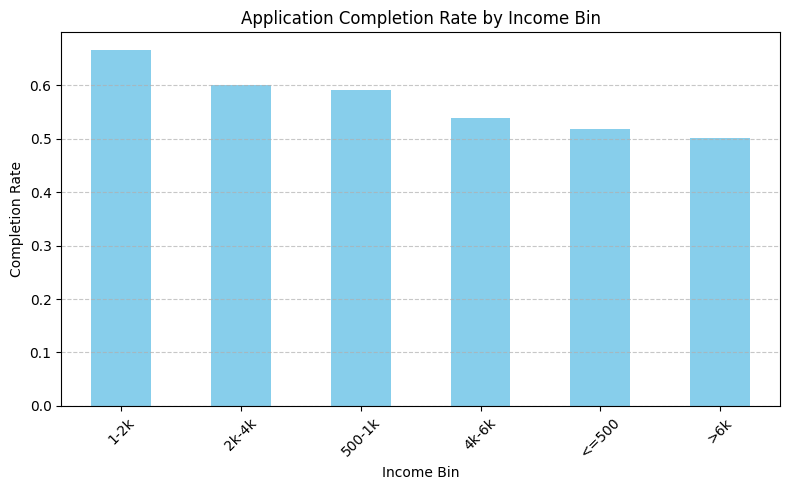

In [11]:


# For customers_employer, perpay_risk_tier (categorical), we can group by each category:
employer_completion = data.groupby('customers_employer')['application_completed_flag'].mean().sort_values(ascending=False)
print("=== Completion Rate by 'customers_employer' ===")
print(employer_completion)

risk_tier_completion = data.groupby('perpay_risk_tier')['application_completed_flag'].mean().sort_values(ascending=False)
print("\n=== Completion Rate by 'perpay_risk_tier' ===")
print(risk_tier_completion)

region_completion = data.groupby('region')['application_completed_flag'].mean().sort_values(ascending=False)
print("\n=== Completion Rate by 'region' ===")
print(region_completion)

df_user_completion = data.groupby('user_id')['application_completed_flag'].mean().sort_values(ascending=False)
print("\n=== Completion Rate by 'region' (TOP 20) ===")
print(region_completion.head(20))

print("\n=== Completion Rate by 'region' (BOTTOM 20) ===")
print(region_completion.tail(20))


# For estimated_customer_income (numeric), you could group by bins, for example:
# pd.cut splits the income range into bins
data['income_bin'] = pd.cut(data['estimated_customer_income'], bins=[0, 500, 1000, 2000, 4000, 6000, float('inf')],
                            labels=['<=500','500-1k','1-2k','2k-4k','4k-6k','>6k'])

income_completion = data.groupby('income_bin')['application_completed_flag'].mean().sort_values(ascending=False)
print("\n=== Completion Rate by 'income_bin' ===")
print(income_completion)


plt.figure(figsize=(8, 5))
income_completion.plot(kind='bar', color='skyblue')
plt.title('Application Completion Rate by Income Bin')
plt.xlabel('Income Bin')
plt.ylabel('Completion Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [12]:


# 1. Count total unique user IDs
all_user_ids = data['user_id'].unique()
total_unique_users = len(all_user_ids)
print(f"Total unique user IDs: {total_unique_users}")

# 2. Group by user_id and check how many distinct flags each user has
flag_variations = (
    data
    .groupby('user_id')['application_completed_flag']
    .nunique()  # number of unique flag values (0/1) per user_id
)

# 3. Identify user IDs that have more than 1 unique flag value (i.e., 0 and 1)
inconsistent_user_ids = flag_variations[flag_variations > 1].index
inconsistent_count = len(inconsistent_user_ids)

# Print summary
print(f"Number of users with different 'application_completed_flag' values: {inconsistent_count}")
print(f"\nUser IDs with inconsistent flags:\n{inconsistent_user_ids.tolist()}")



Total unique user IDs: 103029
Number of users with different 'application_completed_flag' values: 4514

User IDs with inconsistent flags:
[74, 104, 112, 150, 252, 289, 2388, 2904, 3381, 4231, 5852, 6311, 6614, 6973, 7012, 7457, 7505, 7718, 8414, 8498, 8898, 9182, 10555, 11001, 11705, 13677, 14409, 15582, 15923, 15948, 17385, 18262, 18332, 18409, 18686, 19134, 19394, 20046, 20801, 20827, 21022, 21033, 21094, 21243, 21688, 22093, 22390, 22462, 23209, 23560, 23649, 23822, 23940, 24468, 24493, 24673, 25505, 26339, 26343, 26462, 26467, 26572, 26616, 27443, 27914, 28023, 28062, 28327, 28522, 28683, 28912, 29034, 29636, 30058, 30151, 30570, 30788, 30971, 30977, 31111, 31785, 32625, 32692, 33799, 34158, 34210, 34478, 34542, 35111, 35134, 35364, 35560, 35598, 35663, 35680, 35783, 36099, 36148, 36262, 36860, 37070, 37507, 38025, 38260, 38333, 38360, 38582, 38733, 39504, 39677, 39709, 39918, 39998, 40389, 40539, 40916, 41294, 41365, 41766, 41801, 42631, 43428, 43698, 43980, 45401, 45402, 45607, 4

In [13]:



# 1. Total rows
total_rows = len(data)
print("Total number of rows in the dataset:", total_rows)

# 2. Count rows with approval_dt
approved_count = data['approval_dt'].notnull().sum()
print("Number of rows with an approval_dt (approved):", approved_count)

# 3. Count rows with denial_dt
denied_count = data['denial_dt'].notnull().sum()
print("Number of rows with a denial_dt (denied):", denied_count)


Total number of rows in the dataset: 138216
Number of rows with an approval_dt (approved): 53929
Number of rows with a denial_dt (denied): 1956


In [14]:
data_completed = data[data['application_completed_flag'] == 1]


In [15]:
data_completed['approved_flag'] = data_completed['approval_dt'].notnull().astype(int)
data_completed['denied_flag'] = data_completed['denial_dt'].notnull().astype(int)


<ipython-input-15-5819681d1342>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_completed['approved_flag'] = data_completed['approval_dt'].notnull().astype(int)
<ipython-input-15-5819681d1342>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_completed['denied_flag'] = data_completed['denial_dt'].notnull().astype(int)


In [16]:


numeric_cols = [
    'loan_amount', 'number_of_payments', 'delinquent_balance_d30',
    'delinquent_balance_d60', 'pinwheel_eligible_ind',
    'estimated_customer_income', 'paystub_review_required_ind',
    'loans_in_repayment_at_review', 'loans_complete_at_review',
    'deposit_amount_recieved_at_review', 'deposit_count_at_review',
    'payments_to_loan_to_date', 'payments_amount_to_loan_to_date',
    'm12_dollar_chargeoff'
]

# Group by approved_flag (or denied_flag) and compute mean
approved_stats = (
    data_completed
    .groupby('approved_flag')[numeric_cols]
    .mean()
)
print("Mean values by approved_flag (among completed apps):")
print(approved_stats)


Mean values by approved_flag (among completed apps):
               loan_amount  number_of_payments  delinquent_balance_d30  \
approved_flag                                                            
0               535.964007           11.097733                     NaN   
1               507.583068           11.536938               19.551832   

               delinquent_balance_d60  pinwheel_eligible_ind  \
approved_flag                                                  
0                                 NaN               0.485457   
1                            50.08676               0.801072   

               estimated_customer_income  paystub_review_required_ind  \
approved_flag                                                           
0                            1169.281826                     0.002073   
1                            1258.043395                     0.001113   

               loans_in_repayment_at_review  loans_complete_at_review  \
approved_flag              

In [17]:
categorical_cols = [
    'application_start_dt', 'application_complete_dt', 'approval_dt',
       'denial_dt', 'loan_initiation_dt', 'canceled_application_dt',
       'loan_completion_dt', 'perpay_risk_tier', 'loan_current_status',
       'customers_employer', 'approval_type', 'region',
       'customer_acquisition_platform'
]

for cat_col in categorical_cols:
    completion_rate = (
        data_completed
        .groupby([cat_col, 'approved_flag'])
        .size()  # or .count()
        .unstack('approved_flag', fill_value=0)
    )
    print(f"\n=== {cat_col} vs. approved_flag ===")
    print(completion_rate)



=== application_start_dt vs. approved_flag ===
approved_flag          0    1
application_start_dt         
2018-01-01             6   17
2018-01-02            16   17
2018-01-03             9   16
2018-01-04            12   17
2018-01-05            17   23
...                   ..  ...
2019-12-27            75  119
2019-12-28            66   72
2019-12-29            53   72
2019-12-30            62   76
2019-12-31            56   73

[730 rows x 2 columns]

=== application_complete_dt vs. approved_flag ===
approved_flag             0   1
application_complete_dt        
2018-01-01                6  14
2018-01-02               15  17
2018-01-03                7  13
2018-01-04               13  18
2018-01-05               15  24
...                      ..  ..
2020-01-06                1   0
2020-01-07                1   1
2020-01-08                0   2
2020-01-09                0   1
2020-01-12                1   0

[739 rows x 2 columns]

=== approval_dt vs. approved_flag ===
approved

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# We'll ignore direct date columns or direct flags like denial_dt
features = numeric_cols + [c for c in categorical_cols if c not in ['approval_dt', 'denial_dt']]

# Prepare a copy
df_model = data_completed.copy()

# Label-encode each categorical col
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

X = df_model[features]
y = df_model['approved_flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy on test:", model.score(X_test, y_test))

importances = model.feature_importances_
for feature_name, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(feature_name, imp)


Accuracy on test: 0.9950415866922585
customers_employer 0.6564069602836224
delinquent_balance_d30 0.05289111915238747
delinquent_balance_d60 0.05064434238339379
loan_initiation_dt 0.0426161746909431
pinwheel_eligible_ind 0.04207220848429323
canceled_application_dt 0.02215989450903717
payments_amount_to_loan_to_date 0.019606976087311136
payments_to_loan_to_date 0.017284599553020995
m12_dollar_chargeoff 0.015895059831501124
loan_current_status 0.013013402935608766
approval_type 0.0111204688295584
loan_completion_dt 0.008482880628456589
application_start_dt 0.007999859693683144
application_complete_dt 0.0068680214028910055
loan_amount 0.004945878823903244
deposit_amount_recieved_at_review 0.0047385614474243385
deposit_count_at_review 0.004615096469709961
estimated_customer_income 0.004465613860428801
perpay_risk_tier 0.004285126855607338
loans_in_repayment_at_review 0.0031731638644241287
region 0.002594891327142234
loans_complete_at_review 0.0015676704923749435
number_of_payments 0.001468

In [19]:
# Assuming your DataFrame is already named 'data' and has the required columns

# Define bins and labels
bins = [0, 100, 200, 300, 400, 500, 600, 700, float('inf')]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '>700']

# Bin delinquent_balance_d30 and delinquent_balance_d60
data['d30_range'] = pd.cut(data['delinquent_balance_d30'], bins=bins, labels=labels, right=False)
data['d60_range'] = pd.cut(data['delinquent_balance_d60'], bins=bins, labels=labels, right=False)

# Group and count occurrences for D30 and D60
d30_grouped = data['d30_range'].value_counts().sort_index()
d60_grouped = data['d60_range'].value_counts().sort_index()

# Display the grouped data
print("=== Delinquent Balance D30 Grouping ===")
print(d30_grouped)

print("\n=== Delinquent Balance D60 Grouping ===")
print(d60_grouped)


=== Delinquent Balance D30 Grouping ===
d30_range
0-100      25831
100-200      164
200-300      175
300-400      141
400-500      161
500-600      107
600-700       66
>700         214
Name: count, dtype: int64

=== Delinquent Balance D60 Grouping ===
d60_range
0-100      23909
100-200      682
200-300      549
300-400      455
400-500      365
500-600      221
600-700      164
>700         514
Name: count, dtype: int64


In [20]:
# Ensure `data_completed` and `data` have the correct alignment on indexes
# Check if `d30_range` and `d60_range` exist in `data`
if 'd30_range' in data.columns and 'd60_range' in data.columns:
    # Merge d30_range and d60_range into data_completed
    data_completed = data_completed.merge(data[['d30_range', 'd60_range']], left_index=True, right_index=True, how='inner')
else:
    print("Columns 'd30_range' and 'd60_range' are missing in 'data'. Please ensure they are created.")

# Now confirm that `d30_range` and `d60_range` exist in data_completed
if 'd30_range' in data_completed.columns and 'approved_flag' in data_completed.columns:
    # Group by d30_range and approved_flag to count occurrences
    d30_approval = data_completed.groupby(['d30_range', 'approved_flag']).size().unstack(fill_value=0)

    # Display results for d30_range
    print("=== Delinquent Balance D30 Approval Counts ===")
    print(d30_approval)
else:
    print("Required columns ('d30_range' or 'approved_flag') are missing in 'data_completed'.")

if 'd60_range' in data_completed.columns and 'approved_flag' in data_completed.columns:
    # Group by d60_range and approved_flag to count occurrences
    d60_approval = data_completed.groupby(['d60_range', 'approved_flag']).size().unstack(fill_value=0)

    # Display results for d60_range
    print("\n=== Delinquent Balance D60 Approval Counts ===")
    print(d60_approval)
else:
    print("Required columns ('d60_range' or 'approved_flag') are missing in 'data_completed'.")


=== Delinquent Balance D30 Approval Counts ===
approved_flag  0      1
d30_range              
0-100          0  25831
100-200        0    164
200-300        0    175
300-400        0    141
400-500        0    161
500-600        0    107
600-700        0     66
>700           0    214

=== Delinquent Balance D60 Approval Counts ===
approved_flag  0      1
d60_range              
0-100          0  23909
100-200        0    682
200-300        0    549
300-400        0    455
400-500        0    365
500-600        0    221
600-700        0    164
>700           0    514


<ipython-input-20-b2375a2fc468>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d30_approval = data_completed.groupby(['d30_range', 'approved_flag']).size().unstack(fill_value=0)
<ipython-input-20-b2375a2fc468>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d60_approval = data_completed.groupby(['d60_range', 'approved_flag']).size().unstack(fill_value=0)


In [21]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] user_dataset.csv'
data2 = pd.read_csv(file_path)

data.head()

,loan_id,user_id,application_start_dt,application_complete_dt,approval_dt,denial_dt,loan_initiation_dt,canceled_application_dt,loan_completion_dt,loan_amount,...,deposit_amount_recieved_at_review,deposit_count_at_review,payments_to_loan_to_date,payments_amount_to_loan_to_date,customer_acquisition_platform,m12_dollar_chargeoff,application_completed_flag,income_bin,d30_range,d60_range
0,886208,1525324,2019-09-12,NaN,NaN,NaN,NaN,2019-09-26,NaN,556.16,...,0.0,0,NaN,NaN,Facebook,NaN,0,<=500,NaN,NaN
1,524108,840515,2019-01-31,NaN,NaN,NaN,NaN,2019-02-15,NaN,297.19,...,0.0,0,NaN,NaN,Mandrill,NaN,0,500-1k,NaN,NaN
2,476207,409144,2018-12-23,NaN,NaN,NaN,NaN,2019-01-07,NaN,141.97,...,0.0,0,NaN,NaN,MailChimp,NaN,0,1-2k,NaN,NaN
3,1128905,1895923,2019-12-13,NaN,NaN,NaN,NaN,2019-12-28,NaN,539.98,...,0.0,0,NaN,NaN,NaN,NaN,0,1-2k,NaN,NaN
4,1086705,1554117,2019-12-05,NaN,NaN,NaN,NaN,2019-12-20,NaN,489.98,...,0.0,0,NaN,NaN,Facebook,NaN,0,1-2k,NaN,NaN


In [22]:


# Step 1: Group by user_id in data and calculate the average of application_completed_flag
user_avg_flag = data.groupby('user_id')['application_completed_flag'].mean().reset_index()

# Step 2: Merge the grouped DataFrame with data2 based on user_id
merged_data = pd.merge(data2, user_avg_flag, on='user_id', how='inner')

# Step 3: The result will contain only rows with user_id in both data2 and user_avg_flag
# 'how="inner"' ensures only matching user_id rows are kept

# Display the merged DataFrame
print(merged_data)

# Optional: Save the resulting DataFrame to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)


       user_id   signup_dt  email_verified_ind  ssn_is_verified_ind  \
0        22940  2016-04-06                   1                    1   
1        39622  2016-04-06                   1                    1   
2        41247  2016-06-30                   1                    1   
3        59742  2016-08-24                   1                    1   
4        81542  2016-10-25                   1                    1   
...        ...         ...                 ...                  ...   
62949   509721  2018-10-09                   1                    1   
62950   588215  2018-11-10                   1                    0   
62951   633822  2018-11-20                   0                    0   
62952   663741  2018-11-27                   1                    1   
62953   867708  2019-02-16                   1                    1   

       valid_phone_ind  verified_phone_ind  full_signup_ind  was_referred_ind  \
0                    1                   1                1       

In [23]:
# Check for duplicated user_id in the merged_data DataFrame
duplicated_user_ids = merged_data[merged_data['user_id'].duplicated()]

if not duplicated_user_ids.empty:
    print("There are duplicated user_id(s) in merged_data:")
    print(duplicated_user_ids)
else:
    print("No duplicated user_id(s) found in merged_data.")


No duplicated user_id(s) found in merged_data.


In [24]:
# Load the merged_data.csv file
merged_data = pd.read_csv("merged_data.csv")

# Separate numeric and non-numeric columns
numeric_cols = merged_data.select_dtypes(include=['number']).columns.tolist()
non_numeric_cols = merged_data.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric Columns:")
print(numeric_cols)
print("\nNon-Numeric Columns:")
print(non_numeric_cols)


Numeric Columns:
['user_id', 'email_verified_ind', 'ssn_is_verified_ind', 'valid_phone_ind', 'verified_phone_ind', 'full_signup_ind', 'was_referred_ind', 'downloaded_mobile_app_ind', 'intercom_engaged_ind', 'first_spending_limit', 'current_spending_limit', 'application_completed_flag']

Non-Numeric Columns:
['signup_dt', 'first_session_device', 'date_of_birth', 'plus_status', 'first_application_start_ts', 'first_application_complete_ts', 'first_awaiting_payment_ts', 'first_denied_ts', 'first_canceled_ts', 'first_repayment_ts']


In [25]:
print(merged_data['application_completed_flag'].unique())
print(merged_data['application_completed_flag'].value_counts())


[1.         0.         0.75       0.33333333 0.5        0.83333333
 0.66666667 0.85714286 0.88888889 0.92857143 0.25       0.8
 0.6        0.71428571 0.94444444 0.9        0.97058824 0.96153846
 0.72727273 0.875      0.77777778 0.9375     0.625      0.95
 0.55555556 0.93333333 0.4        0.90909091 0.57142857 0.81818182
 0.92307692 0.7        0.95652174 0.42857143 0.91666667 0.95454545
 0.97777778 0.84615385 0.95833333 0.94117647 0.78571429]
application_completed_flag
1.000000    30730
0.000000    29424
0.500000     1658
0.666667      436
0.750000      188
0.800000      112
0.333333      102
0.833333       63
0.857143       63
0.600000       26
0.875000       25
0.888889       22
0.250000       14
0.900000       13
0.714286       13
0.777778       10
0.928571        6
0.909091        6
0.818182        5
0.625000        4
0.571429        3
0.400000        3
0.727273        3
0.700000        3
0.933333        3
0.961538        2
0.846154        2
0.937500        2
0.916667        1
0.958

In [26]:
# Convert application_completed_flag to binary (1 if ≥ 0.5, 0 otherwise)
merged_data['application_completed_flag_binary'] = (merged_data['application_completed_flag'] >= 0.5).astype(int)


In [27]:
print(merged_data.columns)


Index(['user_id', 'signup_dt', 'email_verified_ind', 'ssn_is_verified_ind',
       'valid_phone_ind', 'verified_phone_ind', 'full_signup_ind',
       'was_referred_ind', 'first_session_device', 'date_of_birth',
       'downloaded_mobile_app_ind', 'intercom_engaged_ind', 'plus_status',
       'first_application_start_ts', 'first_application_complete_ts',
       'first_awaiting_payment_ts', 'first_denied_ts', 'first_canceled_ts',
       'first_repayment_ts', 'first_spending_limit', 'current_spending_limit',
       'application_completed_flag', 'application_completed_flag_binary'],
      dtype='object')


In [28]:


# Define the target and features
target = 'application_completed_flag_binary'
features = [col for col in merged_data.columns if col != target and col != 'user_id' and col !='application_completed_flag' and col !='first_application_complete_ts' and col !='first_awaiting_payment_ts']

# Limit to a subset of features to avoid crashes (if needed)
# features = features[:20]  # Uncomment this line if you want to limit the features

# Encode non-numeric features using Label Encoding
merged_data_encoded = merged_data.copy()
label_encoders = {}

for col in non_numeric_cols:
    le = LabelEncoder()
    merged_data_encoded[col] = le.fit_transform(merged_data_encoded[col].astype(str))
    label_encoders[col] = le

# Define X and y
X = merged_data_encoded[features]
y = merged_data_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a smaller Random Forest to avoid crashing
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Evaluate model accuracy
accuracy = model.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy}")


Feature Importances:
                       Feature  Importance
2          ssn_is_verified_ind    0.221439
10        intercom_engaged_ind    0.167878
15          first_repayment_ts    0.122723
17      current_spending_limit    0.119138
1           email_verified_ind    0.093070
16        first_spending_limit    0.078458
14           first_canceled_ts    0.054637
8                date_of_birth    0.034850
12  first_application_start_ts    0.029325
11                 plus_status    0.028072
0                    signup_dt    0.024407
13             first_denied_ts    0.012505
7         first_session_device    0.009437
9    downloaded_mobile_app_ind    0.002448
6             was_referred_ind    0.000668
4           verified_phone_ind    0.000374
5              full_signup_ind    0.000306
3              valid_phone_ind    0.000266

Model Accuracy: 0.8047334145179224


In [29]:

# Step 1: Group by user_id in data_completed (where application_completed_flag == 1)
# and calculate the average of approved_flag
user_avg_approval = (
    data_completed.groupby('user_id')['approved_flag']
        .mean()
        .reset_index()
        .rename(columns={'approved_flag': 'avg_approved_flag'})
)

# Step 2: Merge the calculated average approved_flag with data2 based on user_id
merged_data2 = pd.merge(data2, user_avg_approval, on='user_id', how='inner')

# Step 3: Display the resulting merged_data2
print(merged_data2.head())  # Check the first few rows

# Optional: Save the result to a CSV file
merged_data2.to_csv('merged_data2.csv', index=False)


   user_id   signup_dt  email_verified_ind  ssn_is_verified_ind  \
0    22940  2016-04-06                   1                    1   
1    39622  2016-04-06                   1                    1   
2    41247  2016-06-30                   1                    1   
3    59742  2016-08-24                   1                    1   
4    81542  2016-10-25                   1                    1   

   valid_phone_ind  verified_phone_ind  full_signup_ind  was_referred_ind  \
0                1                   1                1                 0   
1                1                   1                1                 0   
2                1                   1                1                 0   
3                1                   1                1                 0   
4                1                   1                1                 0   

     first_session_device date_of_birth  ...  plus_status  \
0  PC - Internet Explorer    1982-02-24  ...      enabled   
1         iP

In [30]:
# Convert avg_approved_flag into binary and add as a new column
merged_data2['binary_avg_approved_flag'] = (merged_data2['avg_approved_flag'] >= 0.5).astype(int)

# Display the first few rows of merged_data2 to verify the change
print(merged_data2.head())


   user_id   signup_dt  email_verified_ind  ssn_is_verified_ind  \
0    22940  2016-04-06                   1                    1   
1    39622  2016-04-06                   1                    1   
2    41247  2016-06-30                   1                    1   
3    59742  2016-08-24                   1                    1   
4    81542  2016-10-25                   1                    1   

   valid_phone_ind  verified_phone_ind  full_signup_ind  was_referred_ind  \
0                1                   1                1                 0   
1                1                   1                1                 0   
2                1                   1                1                 0   
3                1                   1                1                 0   
4                1                   1                1                 0   

     first_session_device date_of_birth  ...  first_application_start_ts  \
0  PC - Internet Explorer    1982-02-24  ...  2016-04-07 1

In [31]:
# Separate numeric and non-numeric columns
numeric_columns = merged_data2.select_dtypes(include=['number']).columns.tolist()
non_numeric_columns = merged_data2.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric Columns:")
print(numeric_columns)

print("\nNon-Numeric Columns:")
print(non_numeric_columns)


Numeric Columns:
['user_id', 'email_verified_ind', 'ssn_is_verified_ind', 'valid_phone_ind', 'verified_phone_ind', 'full_signup_ind', 'was_referred_ind', 'downloaded_mobile_app_ind', 'intercom_engaged_ind', 'first_spending_limit', 'current_spending_limit', 'avg_approved_flag', 'binary_avg_approved_flag']

Non-Numeric Columns:
['signup_dt', 'first_session_device', 'date_of_birth', 'plus_status', 'first_application_start_ts', 'first_application_complete_ts', 'first_awaiting_payment_ts', 'first_denied_ts', 'first_canceled_ts', 'first_repayment_ts']


In [32]:

# Step 2: Make a copy of the dataset to avoid modifying the original
df_encoded = merged_data2.copy()

# Step 3: Label encode non-numeric columns
for col in non_numeric_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Step 4: Drop binary_avg_approved_flag and avg_approved_flag from features
X = df_encoded.drop(columns=['binary_avg_approved_flag', 'avg_approved_flag'])  # Drop target and redundant variable
Y = df_encoded['binary_avg_approved_flag']  # Define the target variable

# Step 5: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, Y)

# Step 6: Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Step 7: Display the top 10 most important features
print("Top 10 Feature Importances:")
print(feature_importances.head(10))

# Optional: Save feature importance to a CSV
feature_importances.to_csv('feature_importances.csv', index=False)


Top 10 Feature Importances:
                          Feature  Importance
15      first_awaiting_payment_ts    0.412940
20         current_spending_limit    0.081521
18             first_repayment_ts    0.072350
17              first_canceled_ts    0.055699
14  first_application_complete_ts    0.044443
9                   date_of_birth    0.043907
19           first_spending_limit    0.043792
0                         user_id    0.043124
13     first_application_start_ts    0.042234
1                       signup_dt    0.039206


In [33]:
# Group by current_spending_limit and calculate approval rate
spending_limit_approval = (
    merged_data2.groupby('current_spending_limit')['binary_avg_approved_flag']
    .mean()
    .reset_index()
    .rename(columns={'binary_avg_approved_flag': 'approval_rate'})
)

# Sort by spending limit or approval rate to interpret results
spending_limit_approval = spending_limit_approval.sort_values(by='approval_rate', ascending=False)
print(spending_limit_approval.head(10))  # Top 10 spending limits with the highest approval rates
print(spending_limit_approval.tail(10))  # Top 10 spending limits with the highest approval rates


     current_spending_limit  approval_rate
843                  4050.0            1.0
782                  2990.0            1.0
798                  3130.0            1.0
840                  3490.0            1.0
796                  3120.0            1.0
795                  3110.0            1.0
793                  3090.0            1.0
786                  3025.0            1.0
785                  3020.0            1.0
775                  2930.0            1.0
     current_spending_limit  approval_rate
322                  673.33            0.0
323                  674.94            0.0
325                  675.33            0.0
326                  675.81            0.0
327                  676.00            0.0
328                  677.33            0.0
329                  677.60            0.0
330                  679.20            0.0
332                  680.32            0.0
422                  756.00            0.0


In [34]:
# Create a flag: 1 if first_canceled_ts exists, 0 otherwise
merged_data2['canceled_flag'] = merged_data2['first_canceled_ts'].notnull().astype(int)

# Calculate approval rates based on the canceled flag
canceled_approval = (
    merged_data2.groupby('canceled_flag')['binary_avg_approved_flag']
    .mean()
    .reset_index()
    .rename(columns={'binary_avg_approved_flag': 'approval_rate'})
)

print(canceled_approval)


   canceled_flag  approval_rate
0              0       0.747059
1              1       0.622455


In [35]:
from datetime import datetime

# Calculate age from date_of_birth
merged_data2['age'] = (datetime.now() - pd.to_datetime(merged_data2['date_of_birth'])).dt.days // 365

# Bin ages into ranges (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65, 75, 100]  # Age ranges
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']
merged_data2['age_group'] = pd.cut(merged_data2['age'], bins=bins, labels=labels, right=False)

# Group by age_group and calculate approval rates
age_approval = (
    merged_data2.groupby('age_group')['binary_avg_approved_flag']
    .mean()
    .reset_index()
    .rename(columns={'binary_avg_approved_flag': 'approval_rate'})
)

print(age_approval)


  age_group  approval_rate
0     18-25       0.261157
1     26-35       0.561117
2     36-45       0.652526
3     46-55       0.692329
4     56-65       0.710549
5     66-75       0.584718
6       75+       0.224138


<ipython-input-35-18215c9f65ad>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data2.groupby('age_group')['binary_avg_approved_flag']


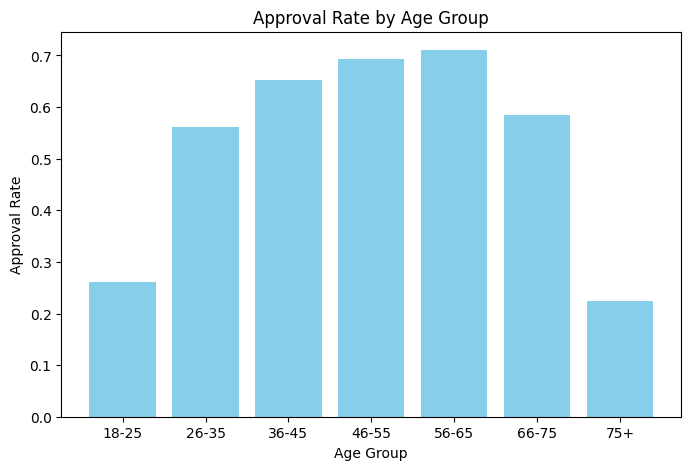

In [36]:
import matplotlib.pyplot as plt

# Example: Approval rate by age group
plt.figure(figsize=(8, 5))
plt.bar(age_approval['age_group'], age_approval['approval_rate'], color='skyblue')
plt.title('Approval Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Approval Rate')
plt.show()

In [37]:
# Count the number of rows where `m12_dollar_chargeoff` has a value greater than 0
non_zero_chargeoff_count = data[data['m12_dollar_chargeoff'] > 0].shape[0]

print(f"Number of rows with m12_dollar_chargeoff > 0: {non_zero_chargeoff_count}")


Number of rows with m12_dollar_chargeoff > 0: 4645


In [38]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Check if the column exists
if 'm12_dollar_chargeoff' in data.columns:
    # Count rows with values greater than 0
    count_positive_values = data['m12_dollar_chargeoff'].apply(pd.to_numeric, errors='coerce').fillna(0)
    count_positive_values = (count_positive_values > 0).sum()

    print(f"Number of rows with value greater than 0 in 'm12_dollar_chargeoff': {count_positive_values}")
else:
    print("The column 'm12_dollar_chargeoff' does not exist in the dataset.")


<ipython-input-38-a5ded7ad511e>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of rows with value greater than 0 in 'm12_dollar_chargeoff': 4645


In [39]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Check if the required columns exist
columns_to_check = ['delinquent_balance_d30', 'delinquent_balance_d60']
for column in columns_to_check:
    if column in data.columns:
        # Convert to numeric and handle blanks
        count_positive_values = data[column].apply(pd.to_numeric, errors='coerce').fillna(0)
        count_positive_values = (count_positive_values > 0).sum()
        print(f"Number of rows with value greater than 0 in '{column}': {count_positive_values}")
    else:
        print(f"The column '{column}' does not exist in the dataset.")


<ipython-input-39-d8acbdd78c1c>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of rows with value greater than 0 in 'delinquent_balance_d30': 1120
Number of rows with value greater than 0 in 'delinquent_balance_d60': 3336


In [40]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Check if the column exists
if 'approval_dt' in data.columns:
    # Count rows that are not blank (non-empty values)
    count_non_blank = data['approval_dt'].notna().sum()
    print(f"Number of rows with a value in 'approval_dt': {count_non_blank}")
else:
    print("The column 'approval_dt' does not exist in the dataset.")


Number of rows with a value in 'approval_dt': 53929


<ipython-input-40-0926648bfd9b>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [41]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Check if the column exists
if 'loan_id' in data.columns:
    # Count rows that are not blank (non-empty values)
    count_non_blank = data['loan_id'].notna().sum()
    print(f"Number of rows with a value in 'loan_id': {count_non_blank}")
else:
    print("The column 'loan_id' does not exist in the dataset.")

Number of rows with a value in 'loan_id': 138216


<ipython-input-41-c741bd734361>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [42]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)
# Check if the required columns exist
if {'approval_dt', 'canceled_application_dt'}.issubset(data.columns):
    # Count rows where both columns have non-blank values
    count_both_non_blank = data['approval_dt'].notna() & data['canceled_application_dt'].notna()
    count_both_non_blank = count_both_non_blank.sum()
    print(f"Number of rows where both 'approval_dt' and 'canceled_application_dt' have a value: {count_both_non_blank}")
else:
    print("One or both of the columns 'approval_dt' and 'canceled_application_dt' do not exist in the dataset.")

Number of rows where both 'approval_dt' and 'canceled_application_dt' have a value: 27069


<ipython-input-42-350182158a3d>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [43]:


# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Specify the target and features
target = 'delinquent_balance_d30'
categorical_cols = ['application_start_dt', 'application_complete_dt', 'approval_dt',
       'denial_dt', 'loan_initiation_dt', 'canceled_application_dt',
       'loan_completion_dt', 'perpay_risk_tier', 'loan_current_status',
       'customers_employer', 'approval_type', 'region',
       'customer_acquisition_platform']  # Replace with actual categorical column names
numeric_cols = ['loan_id', 'user_id', 'loan_amount', 'number_of_payments',
       'pinwheel_eligible_ind', 'estimated_customer_income',
       'paystub_review_required_ind', 'loans_in_repayment_at_review',
       'loans_complete_at_review', 'deposit_amount_recieved_at_review',
       'deposit_count_at_review', 'payments_to_loan_to_date',
       'payments_amount_to_loan_to_date']  # Replace with actual numeric column names

# Combine categorical and numeric columns into features
all_features = categorical_cols + numeric_cols

# Ensure the target and features exist in the dataset
if target in data.columns and all(col in data.columns for col in all_features):
    # Label encode the categorical columns
    data_encoded = data.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))

    # Prepare the feature matrix and target vector
    X = data_encoded[all_features]
    y = data_encoded[target]

    # Drop rows with missing values in X or y
    X = X.dropna()
    y = y.loc[X.index]

    # Train a Random Forest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)
else:
    print("Ensure the target and all specified feature columns exist in the dataset.")


<ipython-input-43-431bbe6361b9>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Feature Importance:
                              Feature  Importance
15                        loan_amount    0.233974
24           payments_to_loan_to_date    0.139701
25    payments_amount_to_loan_to_date    0.115991
18          estimated_customer_income    0.052011
22  deposit_amount_recieved_at_review    0.051503
9                  customers_employer    0.045466
8                 loan_current_status    0.045041
14                            user_id    0.042156
20       loans_in_repayment_at_review    0.032226
4                  loan_initiation_dt    0.029087
23            deposit_count_at_review    0.028124
11                             region    0.023895
13                            loan_id    0.022090
16                 number_of_payments    0.021014
6                  loan_completion_dt    0.020332
2                         approval_dt    0.018626
1             application_complete_dt    0.017420
0                application_start_dt    0.015930
21           loans_complete_at

In [44]:


# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Specify the target and features
target = 'delinquent_balance_d60'
categorical_cols = ['application_start_dt', 'application_complete_dt', 'approval_dt',
       'denial_dt', 'loan_initiation_dt', 'canceled_application_dt',
       'loan_completion_dt', 'perpay_risk_tier', 'loan_current_status',
       'customers_employer', 'approval_type', 'region',
       'customer_acquisition_platform']  # Replace with actual categorical column names
numeric_cols = ['loan_id', 'user_id', 'loan_amount', 'number_of_payments',
       'pinwheel_eligible_ind', 'estimated_customer_income',
       'paystub_review_required_ind', 'loans_in_repayment_at_review',
       'loans_complete_at_review', 'deposit_amount_recieved_at_review',
       'deposit_count_at_review', 'payments_to_loan_to_date',
       'payments_amount_to_loan_to_date']  # Replace with actual numeric column names

# Combine categorical and numeric columns into features
all_features = categorical_cols + numeric_cols

# Ensure the target and features exist in the dataset
if target in data.columns and all(col in data.columns for col in all_features):
    # Label encode the categorical columns
    data_encoded = data.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))

    # Prepare the feature matrix and target vector
    X = data_encoded[all_features]
    y = data_encoded[target]

    # Drop rows with missing values in X or y
    X = X.dropna()
    y = y.loc[X.index]

    # Train a Random Forest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)
else:
    print("Ensure the target and all specified feature columns exist in the dataset.")


<ipython-input-44-bf511ee756e7>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Feature Importance:
                              Feature    Importance
15                        loan_amount  2.910546e-01
8                 loan_current_status  1.845457e-01
24           payments_to_loan_to_date  1.401038e-01
25    payments_amount_to_loan_to_date  5.755742e-02
18          estimated_customer_income  3.762839e-02
22  deposit_amount_recieved_at_review  3.331998e-02
14                            user_id  3.247676e-02
9                  customers_employer  2.649210e-02
6                  loan_completion_dt  2.351970e-02
16                 number_of_payments  2.138224e-02
11                             region  2.126980e-02
23            deposit_count_at_review  2.045556e-02
4                  loan_initiation_dt  1.613429e-02
20       loans_in_repayment_at_review  1.604349e-02
13                            loan_id  1.332585e-02
2                         approval_dt  1.177742e-02
21           loans_complete_at_review  1.155004e-02
1             application_complete_dt  1.102

In [45]:


# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Specify the target and features
target = 'm12_dollar_chargeoff'
categorical_cols = ['application_start_dt', 'application_complete_dt', 'approval_dt',
       'denial_dt', 'loan_initiation_dt', 'canceled_application_dt',
       'loan_completion_dt', 'perpay_risk_tier', 'loan_current_status',
       'customers_employer', 'approval_type', 'region',
       'customer_acquisition_platform']  # Replace with actual categorical column names
numeric_cols = ['loan_id', 'user_id', 'loan_amount', 'number_of_payments',
       'pinwheel_eligible_ind', 'estimated_customer_income',
       'paystub_review_required_ind', 'loans_in_repayment_at_review',
       'loans_complete_at_review', 'deposit_amount_recieved_at_review',
       'deposit_count_at_review', 'payments_to_loan_to_date',
       'payments_amount_to_loan_to_date']  # Replace with actual numeric column names

# Combine categorical and numeric columns into features
all_features = categorical_cols + numeric_cols

# Ensure the target and features exist in the dataset
if target in data.columns and all(col in data.columns for col in all_features):
    # Label encode the categorical columns
    data_encoded = data.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))

    # Prepare the feature matrix and target vector
    X = data_encoded[all_features]
    y = data_encoded[target]

    # Drop rows with missing values in X or y
    X = X.dropna()
    y = y.loc[X.index]

    # Train a Random Forest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)
else:
    print("Ensure the target and all specified feature columns exist in the dataset.")


<ipython-input-45-269c173d6ed6>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Feature Importance:
                              Feature    Importance
8                 loan_current_status  4.160503e-01
15                        loan_amount  3.178279e-01
24           payments_to_loan_to_date  1.102275e-01
25    payments_amount_to_loan_to_date  7.557564e-02
14                            user_id  8.645601e-03
18          estimated_customer_income  7.049761e-03
6                  loan_completion_dt  6.860845e-03
22  deposit_amount_recieved_at_review  6.547606e-03
9                  customers_employer  5.773138e-03
23            deposit_count_at_review  5.488443e-03
11                             region  5.424846e-03
20       loans_in_repayment_at_review  4.819623e-03
16                 number_of_payments  4.714077e-03
13                            loan_id  4.045325e-03
4                  loan_initiation_dt  3.998899e-03
2                         approval_dt  3.087355e-03
21           loans_complete_at_review  2.913174e-03
1             application_complete_dt  2.765

In [46]:

# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Define the range bins and labels
bins = [0, 200, 400, 600, 800, 1000]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']

# Check if both columns exist
if {'loan_amount', 'delinquent_balance_d30'}.issubset(data.columns):
    # Create a new column for loan amount range
    data['loan_amount_range'] = pd.cut(data['loan_amount'], bins=bins, labels=labels, right=False)

    # Group by loan amount range and calculate stats for delinquent_balance_d60
    grouped = data.groupby('loan_amount_range')['delinquent_balance_d30'].agg(['count', 'mean', 'sum'])

    # Rename the columns for clarity
    grouped = grouped.rename(columns={
        'count': 'Count of Loans',
        'mean': 'Average Delinquent Balance',
        'sum': 'Total Delinquent Balance'
    })

    print("Analysis of Loan Amount Range related to Delinquent Balance D60:")
    print(grouped)
else:
    print("Columns 'loan_amount' and/or 'delinquent_balance_d60' are missing in the dataset.")


Analysis of Loan Amount Range related to Delinquent Balance D60:
                   Count of Loans  Average Delinquent Balance  \
loan_amount_range                                               
0-200                        5002                    3.894742   
200-400                      7829                    9.930711   
400-600                      5535                   20.192262   
600-800                      3464                   27.223184   
800-1000                     1617                   37.531713   

                   Total Delinquent Balance  
loan_amount_range                            
0-200                              19481.50  
200-400                            77747.54  
400-600                           111764.17  
600-800                            94301.11  
800-1000                           60688.78  


<ipython-input-46-4877b2ce893e>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-46-4877b2ce893e>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('loan_amount_range')['delinquent_balance_d30'].agg(['count', 'mean', 'sum'])


In [47]:

# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Define the range bins and labels
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
labels = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-1500', '1500-1750', '1750-2000']

# Check if both columns exist
if {'estimated_customer_income', 'delinquent_balance_d60'}.issubset(data.columns):
    # Create a new column for estimated customer income range
    data['income_range'] = pd.cut(data['estimated_customer_income'], bins=bins, labels=labels, right=False)

    # Group by income range and calculate stats for delinquent_balance_d30
    grouped = data.groupby('income_range')['delinquent_balance_d60'].agg(['count', 'mean', 'sum'])

    # Rename the columns for clarity
    grouped = grouped.rename(columns={
        'count': 'Count of Customers',
        'mean': 'Average Delinquent Balance',
        'sum': 'Total Delinquent Balance'
    })

    print("Analysis of Estimated Customer Income Range related to Delinquent Balance D60:")
    print(grouped)
else:
    print("Columns 'estimated_customer_income' and/or 'delinquent_balance_d60' are missing in the dataset.")


Analysis of Estimated Customer Income Range related to Delinquent Balance D60:
              Count of Customers  Average Delinquent Balance  \
income_range                                                   
0-250                        301                   34.947010   
250-500                     2112                   45.123395   
500-750                     3589                   50.517802   
750-1000                    4449                   45.846392   
1000-1250                   5572                   44.820504   
1250-1500                   3275                   48.736605   
1500-1750                   2632                   44.447466   
1750-2000                   1309                   68.958480   

              Total Delinquent Balance  
income_range                            
0-250                         10519.05  
250-500                       95300.61  
500-750                      181308.39  
750-1000                     203970.60  
1000-1250                    24973

<ipython-input-47-522131c4fd4b>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-47-522131c4fd4b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('income_range')['delinquent_balance_d60'].agg(['count', 'mean', 'sum'])


In [48]:

# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Define the range bins and labels
bins = [0, 200, 400, 600, 800, 1000]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']

# Check if both columns exist
if {'loan_amount', 'm12_dollar_chargeoff'}.issubset(data.columns):
    # Create a new column for loan amount range
    data['loan_amount_range'] = pd.cut(data['loan_amount'], bins=bins, labels=labels, right=False)

    # Group by loan amount range and calculate stats for m12_dollar_chargeoff
    grouped = data.groupby('loan_amount_range')['m12_dollar_chargeoff'].agg(['count', 'mean', 'sum'])

    # Rename the columns for clarity
    grouped = grouped.rename(columns={
        'count': 'Count of Loans',
        'mean': 'Average Charge-off Amount',
        'sum': 'Total Charge-off Amount'
    })

    print("Analysis of Loan Amount Range related to M12 Dollar Charge-off:")
    print(grouped)
else:
    print("Columns 'loan_amount' and/or 'm12_dollar_chargeoff' are missing in the dataset.")


Analysis of Loan Amount Range related to M12 Dollar Charge-off:
                   Count of Loans  Average Charge-off Amount  \
loan_amount_range                                              
0-200                        5002                  13.181811   
200-400                      7829                  30.204477   
400-600                      5535                  54.878589   
600-800                      3464                  75.591651   
800-1000                     1617                 114.040421   

                   Total Charge-off Amount  
loan_amount_range                           
0-200                             65935.42  
200-400                          236470.85  
400-600                          303752.99  
600-800                          261849.48  
800-1000                         184403.36  


<ipython-input-48-efbacf5959ba>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-48-efbacf5959ba>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('loan_amount_range')['m12_dollar_chargeoff'].agg(['count', 'mean', 'sum'])


In [49]:

# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Define the range bins and labels
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
labels = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-1500', '1500-1750', '1750-2000']

# Check if both columns exist
if {'estimated_customer_income', 'm12_dollar_chargeoff'}.issubset(data.columns):
    # Create a new column for estimated customer income range
    data['income_range'] = pd.cut(data['estimated_customer_income'], bins=bins, labels=labels, right=False)

    # Group by income range and calculate stats for m12_dollar_chargeoff
    grouped = data.groupby('income_range')['m12_dollar_chargeoff'].agg(['count', 'mean', 'sum'])

    # Rename the columns for clarity
    grouped = grouped.rename(columns={
        'count': 'Count of Customers',
        'mean': 'Average Charge-off Amount',
        'sum': 'Total Charge-off Amount'
    })

    print("Analysis of Estimated Customer Income Range related to M12 Dollar Charge-off:")
    print(grouped)
else:
    print("Columns 'estimated_customer_income' and/or 'm12_dollar_chargeoff' are missing in the dataset.")


Analysis of Estimated Customer Income Range related to M12 Dollar Charge-off:
              Count of Customers  Average Charge-off Amount  \
income_range                                                  
0-250                        301                  34.497176   
250-500                     2112                  50.944205   
500-750                     3589                  56.558041   
750-1000                    4449                  55.187952   
1000-1250                   5572                  53.826718   
1250-1500                   3275                  56.996589   
1500-1750                   2632                  55.532086   
1750-2000                   1309                  67.869778   

              Total Charge-off Amount  
income_range                           
0-250                        10383.65  
250-500                     107594.16  
500-750                     202986.81  
750-1000                    245531.20  
1000-1250                   299922.47  
1250-1500  

<ipython-input-49-6c6ec1b270b5>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-49-6c6ec1b270b5>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('income_range')['m12_dollar_chargeoff'].agg(['count', 'mean', 'sum'])


In [50]:


# Check if the required columns exist
required_columns = ['user_id', 'delinquent_balance_d60', 'delinquent_balance_d30', 'm12_dollar_chargeoff']
if all(col in data.columns for col in required_columns):
    # Group by user_id and calculate the average for the specified columns
    merged_data3 = data.groupby('user_id', as_index=False).agg({
        'delinquent_balance_d60': 'mean',
        'delinquent_balance_d30': 'mean',
        'm12_dollar_chargeoff': 'mean'
    })

    # Save the new dataset to a CSV file
    merged_data3.to_csv('merged_data3.csv', index=False)
    print("File 'merged_data3.csv' has been created successfully.")
else:
    print("Some of the required columns are missing in the dataset.")


File 'merged_data3.csv' has been created successfully.


In [ ]:
# Display the first 5 rows of the dataset
print(merged_data3.head())

   user_id  delinquent_balance_d60  delinquent_balance_d30  \
0        9                     NaN                     NaN   
1       16                     0.0                     0.0   
2       40                     0.0                     0.0   
3       43                     0.0                     0.0   
4       61                     NaN                     NaN   

   m12_dollar_chargeoff  
0                   NaN  
1                   0.0  
2                   0.0  
3                   0.0  
4                   NaN  


In [51]:


# Merge the datasets on 'user_id'
merged_data4 = pd.merge(merged_data3, data2, on='user_id', how='inner')

# Save the merged dataset to a new CSV file
merged_data4.to_csv('merged_data4.csv', index=False)

print("File 'merged_data4.csv' has been created successfully.")


File 'merged_data4.csv' has been created successfully.


In [52]:


# Separate numerical and non-numerical variables
numerical_cols = merged_data4.select_dtypes(include=['number']).columns.tolist()
non_numerical_cols = merged_data4.select_dtypes(exclude=['number']).columns.tolist()

# Print identified columns
print("Numerical Columns:", numerical_cols)
print("Non-Numerical Columns:", non_numerical_cols)

# Encode non-numerical columns using LabelEncoder
encoded_data = merged_data4.copy()
for col in non_numerical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))

# Ensure 'delinquent_balance_d30' is in the dataset and is the target variable
if 'delinquent_balance_d30' in encoded_data.columns:
    # Drop rows with NaN in 'delinquent_balance_d30'
    encoded_data = encoded_data.dropna(subset=['delinquent_balance_d30'])

    # Define X (features) and Y (target)
    X = encoded_data.drop(columns=['delinquent_balance_d30',  'delinquent_balance_d60', 'm12_dollar_chargeoff', 'current_spending_limit' ])
    Y = encoded_data['delinquent_balance_d30']

    # Train a Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, Y)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)
else:
    print("The target variable 'delinquent_balance_d30' is not in the dataset.")


Numerical Columns: ['user_id', 'delinquent_balance_d60', 'delinquent_balance_d30', 'm12_dollar_chargeoff', 'email_verified_ind', 'ssn_is_verified_ind', 'valid_phone_ind', 'verified_phone_ind', 'full_signup_ind', 'was_referred_ind', 'downloaded_mobile_app_ind', 'intercom_engaged_ind', 'first_spending_limit', 'current_spending_limit']
Non-Numerical Columns: ['signup_dt', 'first_session_device', 'date_of_birth', 'plus_status', 'first_application_start_ts', 'first_application_complete_ts', 'first_awaiting_payment_ts', 'first_denied_ts', 'first_canceled_ts', 'first_repayment_ts']
Feature Importance:
                          Feature  Importance
9                   date_of_birth    0.187745
18             first_repayment_ts    0.131873
17              first_canceled_ts    0.114827
19           first_spending_limit    0.082732
13     first_application_start_ts    0.081595
15      first_awaiting_payment_ts    0.080849
0                         user_id    0.071600
14  first_application_complete

In [53]:


# Separate numerical and non-numerical variables
numerical_cols = merged_data4.select_dtypes(include=['number']).columns.tolist()
non_numerical_cols = merged_data4.select_dtypes(exclude=['number']).columns.tolist()

# Print identified columns
print("Numerical Columns:", numerical_cols)
print("Non-Numerical Columns:", non_numerical_cols)

# Encode non-numerical columns using LabelEncoder
encoded_data = merged_data4.copy()
for col in non_numerical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))

# Ensure 'delinquent_balance_d60' is in the dataset and is the target variable
if 'delinquent_balance_d60' in encoded_data.columns:
    # Drop rows with NaN in 'delinquent_balance_d60'
    encoded_data = encoded_data.dropna(subset=['delinquent_balance_d60'])

    # Define X (features) and Y (target)
    X = encoded_data.drop(columns=['delinquent_balance_d30',  'delinquent_balance_d60', 'm12_dollar_chargeoff', 'current_spending_limit' ])
    Y = encoded_data['delinquent_balance_d60']

    # Train a Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, Y)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)
else:
    print("The target variable 'delinquent_balance_d60' is not in the dataset.")


Numerical Columns: ['user_id', 'delinquent_balance_d60', 'delinquent_balance_d30', 'm12_dollar_chargeoff', 'email_verified_ind', 'ssn_is_verified_ind', 'valid_phone_ind', 'verified_phone_ind', 'full_signup_ind', 'was_referred_ind', 'downloaded_mobile_app_ind', 'intercom_engaged_ind', 'first_spending_limit', 'current_spending_limit']
Non-Numerical Columns: ['signup_dt', 'first_session_device', 'date_of_birth', 'plus_status', 'first_application_start_ts', 'first_application_complete_ts', 'first_awaiting_payment_ts', 'first_denied_ts', 'first_canceled_ts', 'first_repayment_ts']
Feature Importance:
                          Feature  Importance
9                   date_of_birth    0.184832
17              first_canceled_ts    0.120057
18             first_repayment_ts    0.113537
19           first_spending_limit    0.097816
0                         user_id    0.072394
13     first_application_start_ts    0.070108
15      first_awaiting_payment_ts    0.065536
14  first_application_complete

In [54]:


# Separate numerical and non-numerical variables
numerical_cols = merged_data4.select_dtypes(include=['number']).columns.tolist()
non_numerical_cols = merged_data4.select_dtypes(exclude=['number']).columns.tolist()

# Print identified columns
print("Numerical Columns:", numerical_cols)
print("Non-Numerical Columns:", non_numerical_cols)

# Encode non-numerical columns using LabelEncoder
encoded_data = merged_data4.copy()
for col in non_numerical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))

# Ensure 'm12_dollar_chargeoff' is in the dataset and is the target variable
if 'm12_dollar_chargeoff' in encoded_data.columns:
    # Drop rows with NaN in 'm12_dollar_chargeoff'
    encoded_data = encoded_data.dropna(subset=['m12_dollar_chargeoff'])

    # Define X (features) and Y (target)
    X = encoded_data.drop(columns=['delinquent_balance_d30',  'delinquent_balance_d60', 'm12_dollar_chargeoff', 'current_spending_limit' ])
    Y = encoded_data['m12_dollar_chargeoff']

    # Train a Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, Y)

    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)
else:
    print("The target variable 'm12_dollar_chargeoff' is not in the dataset.")


Numerical Columns: ['user_id', 'delinquent_balance_d60', 'delinquent_balance_d30', 'm12_dollar_chargeoff', 'email_verified_ind', 'ssn_is_verified_ind', 'valid_phone_ind', 'verified_phone_ind', 'full_signup_ind', 'was_referred_ind', 'downloaded_mobile_app_ind', 'intercom_engaged_ind', 'first_spending_limit', 'current_spending_limit']
Non-Numerical Columns: ['signup_dt', 'first_session_device', 'date_of_birth', 'plus_status', 'first_application_start_ts', 'first_application_complete_ts', 'first_awaiting_payment_ts', 'first_denied_ts', 'first_canceled_ts', 'first_repayment_ts']
Feature Importance:
                          Feature  Importance
9                   date_of_birth    0.175207
17              first_canceled_ts    0.120215
18             first_repayment_ts    0.104482
19           first_spending_limit    0.101044
12                    plus_status    0.081400
0                         user_id    0.069192
13     first_application_start_ts    0.064993
15      first_awaiting_payment

In [55]:
import pandas as pd
from datetime import datetime

# Load the merged dataset
merged_data4 = pd.read_csv('merged_data4.csv')

# Ensure 'date_of_birth' is a valid column
if 'date_of_birth' in merged_data4.columns:
    # Calculate age from date_of_birth
    merged_data4['age'] = (datetime.now() - pd.to_datetime(merged_data4['date_of_birth'], errors='coerce')).dt.days // 365

    # Define age bins and labels
    bins = [18, 25, 35, 45, 55, 65, 75, 100]
    labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']

    # Bin ages into defined ranges
    merged_data4['age_range'] = pd.cut(merged_data4['age'], bins=bins, labels=labels, right=False)

    # Calculate average of specified variables for each age range
    averages_by_age_range = merged_data4.groupby('age_range')[['delinquent_balance_d30', 'delinquent_balance_d60', 'm12_dollar_chargeoff']].mean()

    # Display the results
    print("Average Values by Age Range:")
    print(averages_by_age_range)

    # Save the results to a CSV file
    averages_by_age_range.to_csv('age_range_averages.csv')
    print("Results saved to 'age_range_averages.csv'")
else:
    print("The column 'date_of_birth' is not present in the dataset.")



Average Values by Age Range:
           delinquent_balance_d30  delinquent_balance_d60  \
age_range                                                   
18-25                   51.566410               99.501667   
26-35                   31.131409               74.408616   
36-45                   30.970740               73.760277   
46-55                   20.052053               51.113509   
56-65                    9.994953               30.836517   
66-75                    9.415598               36.142011   
75+                      0.000000                0.000000   

           m12_dollar_chargeoff  
age_range                        
18-25                 90.496154  
26-35                 85.608661  
36-45                 81.241036  
46-55                 56.193155  
56-65                 37.800620  
66-75                 48.630016  
75+                    0.000000  
Results saved to 'age_range_averages.csv'


<ipython-input-55-57410a13e022>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages_by_age_range = merged_data4.groupby('age_range')[['delinquent_balance_d30', 'delinquent_balance_d60', 'm12_dollar_chargeoff']].mean()


In [56]:
# Load an CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Assuming your DataFrame is named 'data' and already loaded
# Ensure 'application_start_dt' is in datetime format
data['application_start_dt'] = pd.to_datetime(data['application_start_dt'])

# Filter the data for years 2018 and 2019
data_filtered = data[(data['application_start_dt'].dt.year >= 2018) & (data['application_start_dt'].dt.year <= 2019)]

# Create a 'Quarter' column
data_filtered['Quarter'] = data_filtered['application_start_dt'].dt.to_period('Q')

# Group by Quarter and calculate the summary statistics
quarterly_summary = data_filtered.groupby('Quarter')[
    ['loan_amount', 'delinquent_balance_d30', 'delinquent_balance_d60', 'm12_dollar_chargeoff']
].sum()

# Reset the index for better readability
quarterly_summary.reset_index(inplace=True)

# Display the summary table
print(quarterly_summary)

<ipython-input-56-2c519a424262>:3: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


  Quarter  loan_amount  delinquent_balance_d30  delinquent_balance_d60  \
0  2018Q1   2025716.57                18046.70                37128.89   
1  2018Q2   3418008.36                28555.36                63346.55   
2  2018Q3   5936659.00                39261.23               109713.21   
3  2018Q4  12294318.67               107003.31               307391.38   
4  2019Q1   6993138.28                83330.16               159378.78   
5  2019Q2   8570802.56                73607.71               186279.94   
6  2019Q3  10820211.49                74428.76               162297.83   
7  2019Q4  17675482.36               100909.42               319743.70   

   m12_dollar_chargeoff  
0              43694.26  
1              63635.47  
2             130123.63  
3             328870.24  
4             183496.48  
5             200003.62  
6             187911.57  
7             411378.41  


In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
file_path = '/content/drive/My Drive/data/[Challenge] loan_dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Ensure the data is loaded into a DataFrame named `data`

# Step 2: Filter out rows where `loan_initiation_dt` is blank
filtered_data = data[data['loan_initiation_dt'].notna()]

# Step 3: Label encode the `perpay_risk_tier` column (T0, T1, T2, T3, T4)
le = LabelEncoder()
filtered_data['encoded_risk_tier'] = le.fit_transform(filtered_data['perpay_risk_tier'].astype(str))

# Step 4: Fill blanks in `m12_dollar_chargeoff` with 0 (considering blank as good)
filtered_data['m12_dollar_chargeoff'] = filtered_data['m12_dollar_chargeoff'].fillna(0)

# Step 5: Group by `perpay_risk_tier` and calculate the average `m12_dollar_chargeoff`
grouped_data = filtered_data.groupby('perpay_risk_tier')['m12_dollar_chargeoff'].mean().sort_values(ascending=False)

# Display the grouped averages
print("=== Average m12_dollar_chargeoff by Risk Tier ===")
print(grouped_data)

# Step 6: Identify the risk tier with the highest average charge-off
worse_risk_tier = grouped_data.idxmax()
print("\nRisk Tier with the highest (worse) average m12_dollar_chargeoff:", worse_risk_tier)



<ipython-input-61-49f95a01d0c5>:6: DtypeWarning: Columns (3,4,5,6,8,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-61-49f95a01d0c5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['encoded_risk_tier'] = le.fit_transform(filtered_data['perpay_risk_tier'].astype(str))
<ipython-input-61-49f95a01d0c5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['m12_dollar_chargeoff'] = filtered_data['m12_dollar_

=== Average m12_dollar_chargeoff by Risk Tier ===
perpay_risk_tier
T0    83.119741
T1    64.404207
T3    53.749632
T2    47.571106
T4    45.358403
Name: m12_dollar_chargeoff, dtype: float64

Risk Tier with the highest (worse) average m12_dollar_chargeoff: T0
